In [1]:
import beamtime_config_2018
import ROI_Finder_2018
import XRF_dataset_2018

from beamtime_config_2018 import *
from ROI_Finder_2018 import *
from XRF_dataset_2018 import *


## load 2018 XRF data with baseline settings, annotations and artifacts removed

In [2]:
XRF_data = load_XRF_dataset_2018(noise_type = 'none', base_file_path='/data02/AZC/XRF_Data/' )

X=XRF_data['X']
X_bin=XRF_data['X_bin']
X_Cu=XRF_data['X_Cu']
X_Zn=XRF_data['X_Zn']
X_Ca=XRF_data['X_Ca']
X_K=XRF_data['X_K']
X_P=XRF_data['X_P']
X_S=XRF_data['X_S']
X_Fe=XRF_data['X_Fe']
X_Ni=XRF_data['X_Ni']
X_TFY=XRF_data['X_TFY']
principalDf=XRF_data['principalDf']
X_centers=XRF_data['X_centers']
X_xrf_track_files=XRF_data['X_xrf_track_files']
X_x_res = XRF_data['x_res']
X_y_res = XRF_data['y_res']
X_avg_res = XRF_data['avg_res']

X_x_origin = XRF_data['x_origin']
X_y_origin = XRF_data['y_origin']

X_x_motor = XRF_data['x_motor']
X_y_motor = XRF_data['y_motor']


BASE_PATCH_WIDTH = XRF_data['BASE_PATCH_WIDTH']

# calculate motor coordinates
# centers fro regionprops are in (y,x)

center_offset=0

# X_x_motor = X_x_origin+X_x_res*X_centers[:,1] + center_offset
# X_y_motor = X_y_origin+X_y_res*X_centers[:,0] + center_offset
 

# get the annotated data so remove if not annotated
secondaryDf=principalDf[principalDf['KO_label'] != 'not_annotated' ]
# remove additional artifacts that do not contain 8 pixels
secondaryDf=secondaryDf[secondaryDf['Pixel_count'] >8]

#keep track of the original indices after removing artifacts
secondaryDf['original index'] = secondaryDf.index.to_numpy()
secondaryDf.reset_index(drop=True, inplace=True)

print('Bounding box width and height (pixels):' , BASE_PATCH_WIDTH)

Total extracted cells, features: (554, 14)
Total extracted cell, cell size: (554, 32, 32)
Bounding box width and height (pixels): 32


In [17]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(secondaryDf)

,Pixel_count,area,eccentricity,equivalent_diameter,major_axis_length,minor_axis_length,perimeter,K,P,Ni,Zn,Fe,Cu,BFY,x_res,y_res,avg_res,x_origin,y_origin,x_motor,y_motor,KO_label,K_obs_labels,Ni_obs_labels,Fe_obs_labels,Cu_obs_labels,Ca_obs_labels,Zn_obs_labels,original index,y,PC1,PC2,Class,text_labels
0,21,1.3125,0.846038,1.292721,1.764861,0.940886,3.828427,0.000045,0.000083,0.000058,0.001371,0.000059,0.001371,0.016610,0.25,0.244385,0.247192,285.492157,-1699.985107,297.742157,-1697.052490,dead,low,high,high,high,high,high,3,0,1.801925,1.994807,0,dead cells
1,17,1.0625,0.945978,1.163107,2.102629,0.681738,2.267767,0.000045,0.000041,0.000055,0.001019,0.000076,0.001019,0.017674,0.25,0.244385,0.247192,285.492157,-1699.985107,299.492157,-1696.563721,dead,low,high,high,mid,high,high,4,0,0.332124,0.777606,0,dead cells
2,23,1.4375,0.579046,1.352879,1.519026,1.238454,3.974874,0.000041,0.000040,0.000043,0.001565,0.000070,0.001565,0.016977,0.25,0.244385,0.247192,285.492157,-1699.985107,340.492157,-1696.319336,dead,low,high,high,mid,high,high,6,0,1.400720,3.234302,0,dead cells
3,14,0.8750,0.829925,1.055502,1.414214,0.788954,2.974874,0.000044,0.000061,0.000061,0.001335,0.000071,0.001335,0.018209,0.25,0.244385,0.247192,285.492157,-1699.985107,300.242157,-1695.097412,dead,low,low,low,mid,high,high,9,0,-0.561536,0.988062,0,dead cells
4,28,1.7500,0.484511,1.492705,1.638394,1.433243,4.474874,0.000041,0.000043,0.000068,0.001369,0.000098,0.001369,0.015505,0.25,0.244385,0.247192,285.492157,-1699.985107,347.742157,-1693.631104,dead,low,high,high,mid,high,high,11,0,3.358255,3.390370,0,dead cells
5,20,1.2500,0.923102,1.261566,2.055523,0.790460,3.621320,0.000059,0.000042,0.000044,0.001452,0.000056,0.001452,0.017487,0.25,0.244385,0.247192,285.492157,-1699.985107,328.742157,-1693.142334,dead,low,high,high,mid,high,high,13,0,1.236651,2.253385,0,dead cells
6,10,0.6250,0.616441,0.892062,1.000000,0.787401,2.267767,0.000034,0.000047,0.000045,0.001104,0.000061,0.001104,0.015610,0.25,0.244385,0.247192,285.492157,-1699.985107,350.992157,-1690.454102,dead,low,high,high,mid,high,high,15,0,-2.895257,0.066693,0,dead cells
7,12,0.7500,0.767579,0.977205,1.215187,0.778880,2.621320,0.000044,0.000068,0.000048,0.001030,0.000062,0.001030,0.018261,0.25,0.244385,0.247192,285.492157,-1699.985107,295.992157,-1688.987793,dead,low,mid,mid,mid,high,high,17,0,-1.607115,0.304219,0,dead cells
8,23,1.4375,0.676488,1.352879,1.661357,1.223513,4.328427,0.000050,0.000042,0.000056,0.001405,0.000108,0.001405,0.016623,0.25,0.244385,0.247192,285.492157,-1699.985107,316.492157,-1688.010254,dead,low,mid,mid,mid,high,high,18,0,2.511422,2.669199,0,dead cells
9,11,0.6875,0.755929,0.935603,1.128152,0.738549,2.414214,0.000058,0.000060,0.000065,0.001461,0.000073,0.001461,0.019889,0.25,0.244385,0.247192,285.492157,-1699.985107,293.992157,-1688.254639,dead,low,high,high,mid,high,low,19,0,-1.987020,0.649182,0,dead cells


In [4]:
display(principalDf['y_res'])

0      0.244385
1      0.244385
2      0.244385
3      0.244385
4      0.244385
         ...   
549    0.216309
550    0.216309
551    0.216309
552    0.216309
553    0.216309
Name: y_res, Length: 554, dtype: float32

## view the cells

In [5]:
linethresh_val=0.00001
resolution=DEFAULT_RESOLUTION_CELL

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
%matplotlib inline


def viewer(idx):

    fig = plt.figure(figsize=(10, 20))
    fig.suptitle('cell_img'+ '_' + str(idx))

    ax1 = fig.add_subplot(521)
    ax1.set_title('binary'+ '_' + str(idx))
    im1 = ax1.imshow(X_bin[idx].T, interpolation='none')
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im1, cax=cax, orientation='vertical')
    scalebar_master = ScaleBar( SCALE_UNIT_FACTOR*resolution, "m", color='white', length_fraction=0.10, box_alpha=0.10)
    ax1.add_artist(scalebar_master)
    
    

    ax2 = fig.add_subplot(522)
    ax2.set_title('Cu')
    im2 = ax2.imshow(X_Cu[idx].T, interpolation='none', vmax=0.003087)
#     im2 = ax2.imshow(X_Cu[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val))
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im2, cax=cax, orientation='vertical');


    ax3 = fig.add_subplot(523)
    ax3.set_title('Zn')
    im3 = ax3.imshow(X_Zn[idx].T, interpolation='none', vmax=0.00318)
#     im3 = ax3.imshow(X_Zn[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val))
    divider = make_axes_locatable(ax3)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im3, cax=cax, orientation='vertical');

    ax4 = fig.add_subplot(524)
    ax4.set_title('Ca')
    im4 = ax4.imshow(X_Ca[idx].T, interpolation='none', vmax=0.00174)
#     im4 = ax4.imshow(X_Ca[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val) )
    divider = make_axes_locatable(ax4)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im4, cax=cax, orientation='vertical');


    ax5 = fig.add_subplot(525)
    ax5.set_title('K')
    im5 = ax5.imshow(X_K[idx].T, interpolation='none',vmax=0.000584)
#     im5 = ax5.imshow(X_K[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val))
    divider = make_axes_locatable(ax5)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im5, cax=cax, orientation='vertical');

    ax6 = fig.add_subplot(526)
    ax6.set_title('P')
    im6 = ax6.imshow(X_P[idx].T, interpolation='none', vmax=0.000164)
#     im6 = ax6.imshow(X_P[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val))
    divider = make_axes_locatable(ax6)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im6, cax=cax, orientation='vertical');

    ax7 = fig.add_subplot(527)
    ax7.set_title('S')
    im7 = ax7.imshow(X_S[idx].T, interpolation='none', vmax=0.000122)
#     im7 = ax7.imshow(X_S[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val))
    divider = make_axes_locatable(ax7)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im7, cax=cax, orientation='vertical');

    ax8 = fig.add_subplot(528)
    ax8.set_title('Ni')
    im8 = ax8.imshow(X_Ni[idx].T, interpolation='none', vmax=0.000093)
#     im8 = ax8.imshow(X_Ni[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val))
    divider = make_axes_locatable(ax8)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im8, cax=cax, orientation='vertical');

    ax9 = fig.add_subplot(529)
    ax9.set_title('Fe')
    im9 = ax9.imshow(X_Fe[idx].T, interpolation='none', vmax=0.000139)
#     im9 = ax9.imshow(X_Fe[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val))
    divider = make_axes_locatable(ax9)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im9, cax=cax, orientation='vertical');

    ax10 = fig.add_subplot(5,2,10)
    ax10.set_title('TFY')
    im10 = ax10.imshow(X_TFY[idx].T, interpolation='none', vmax=0.029495)
#     im10 = ax10.imshow(X_TFY[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = 500*linethresh_val))
    divider = make_axes_locatable(ax10)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im10, cax=cax, orientation='vertical');


    

interactive_plot = interactive(viewer, idx=(0, len(X_bin)-1))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=276, description='idx', max=553), Output()), _dom_classes=('widget-inter…

## view cell in main image by selecting same index and choosing the desired channel in the following code block


In [19]:
selected_elm_channel = 'Cu'

%matplotlib inline

def viewer(idx):
    
    x = XRF_image(xrf_filename = X_xrf_track_files[idx],
             BASE_PATCH_WIDTH=32, verbosity=False)
    x.load_xrf_data(hdf5_string='exchange_4')
    
    if selected_elm_channel == 'Cu':
        d_XRF=x.d_Cu

    if selected_elm_channel == 'Zn':
        d_XRF=x.d_Zn

    if selected_elm_channel == 'Ca':
        d_XRF=x.d_Ca

    if selected_elm_channel == 'K':
        d_XRF=x.d_K

    if selected_elm_channel == 'P':
        d_XRF=dx._P

    if selected_elm_channel == 'S':
        d_XRF=x.d_S

    if selected_elm_channel == 'Fe':
        d_XRF=x.d_Fe

    if selected_elm_channel == 'Ni':
        d_XRF=x.d_Ni

    if selected_elm_channel == 'TFY':
        d_XRF=x.d_TFY

    
    print('centers. x, y:',X_centers[idx])
    fig, ax = plt.subplots(dpi=175)
    
    img=ax.imshow(d_XRF)
    ax.set_title('Selected Channel: ' + selected_elm_channel)
    fig.colorbar(img, orientation='vertical')
    
    #16 is the halfwidth of the images
    # we get centers from the patches2d data structure, but the bounding box requires corner points
    
    cell_bbox = patches.Rectangle((X_centers[idx][0]-16, X_centers[idx][1]-16), 32, 32, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(cell_bbox)
    

    # OR PLOT cross-hair to mark location in main image
    ax.plot(X_centers[idx][0], X_centers[idx][1], 'w+', markersize=CROSS_HAIR_SIZE)
    
    print('x_center (motor)',X_x_motor[idx])
    print('y_center (motor)',X_y_motor[idx])
    
    

interactive_plot = interactive(viewer, idx=(0, len(X_bin)-1))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=276, description='idx', max=553), Output()), _dom_classes=('widget-inter…

## Construct the feature array after artifact removal and y variable with 0 and 1

In [7]:
mod_X = np.asarray([
    secondaryDf['area'],secondaryDf['eccentricity'],secondaryDf['equivalent_diameter'],
    secondaryDf['major_axis_length'],secondaryDf['minor_axis_length'],secondaryDf['perimeter'],
    secondaryDf['K'],secondaryDf['P'],secondaryDf['Ni'],secondaryDf['Zn'],secondaryDf['Fe'],
    secondaryDf['Cu'],secondaryDf['BFY']
               ]).T

print('Cells, features', mod_X.shape)

mod_X = np.asarray([
    secondaryDf['area'],secondaryDf['eccentricity'],secondaryDf['equivalent_diameter'],
    secondaryDf['major_axis_length'],secondaryDf['minor_axis_length'],secondaryDf['perimeter'],
    secondaryDf['K'],secondaryDf['P'],secondaryDf['Ni'],secondaryDf['Zn'],secondaryDf['Fe'],
    secondaryDf['Cu'],secondaryDf['BFY']
               ]).T

print('Cells, features', mod_X.shape)

labels = [0] * mod_X.shape[0]

True_list = secondaryDf.loc[
    (secondaryDf['KO_label'] == 'live')
   ].index.tolist()

print('From heuristics, live cell count: ', len(True_list) )

for idx in True_list:
    labels[idx]=1
    
secondaryDf['y'] = labels

Cells, features (303, 13)
Cells, features (303, 13)
From heuristics, live cell count:  85


## perform PCA

Cells, PCs (303, 2)
singular_values_: [37.20672331 35.70114671]
explained_variance: [4.58390814 4.22043668]
components: [[ 0.41713232  0.23324134  0.41880975  0.41010617  0.20284951  0.40656977
   0.19166731  0.24718833  0.19105171 -0.08109155  0.23525062 -0.08109155
  -0.13685688]
 [ 0.2027807   0.00247106  0.19915106  0.12219008  0.21760991  0.1894361
  -0.39926773 -0.31204489 -0.03192634  0.41289993 -0.24734344  0.41289993
   0.4013536 ]]


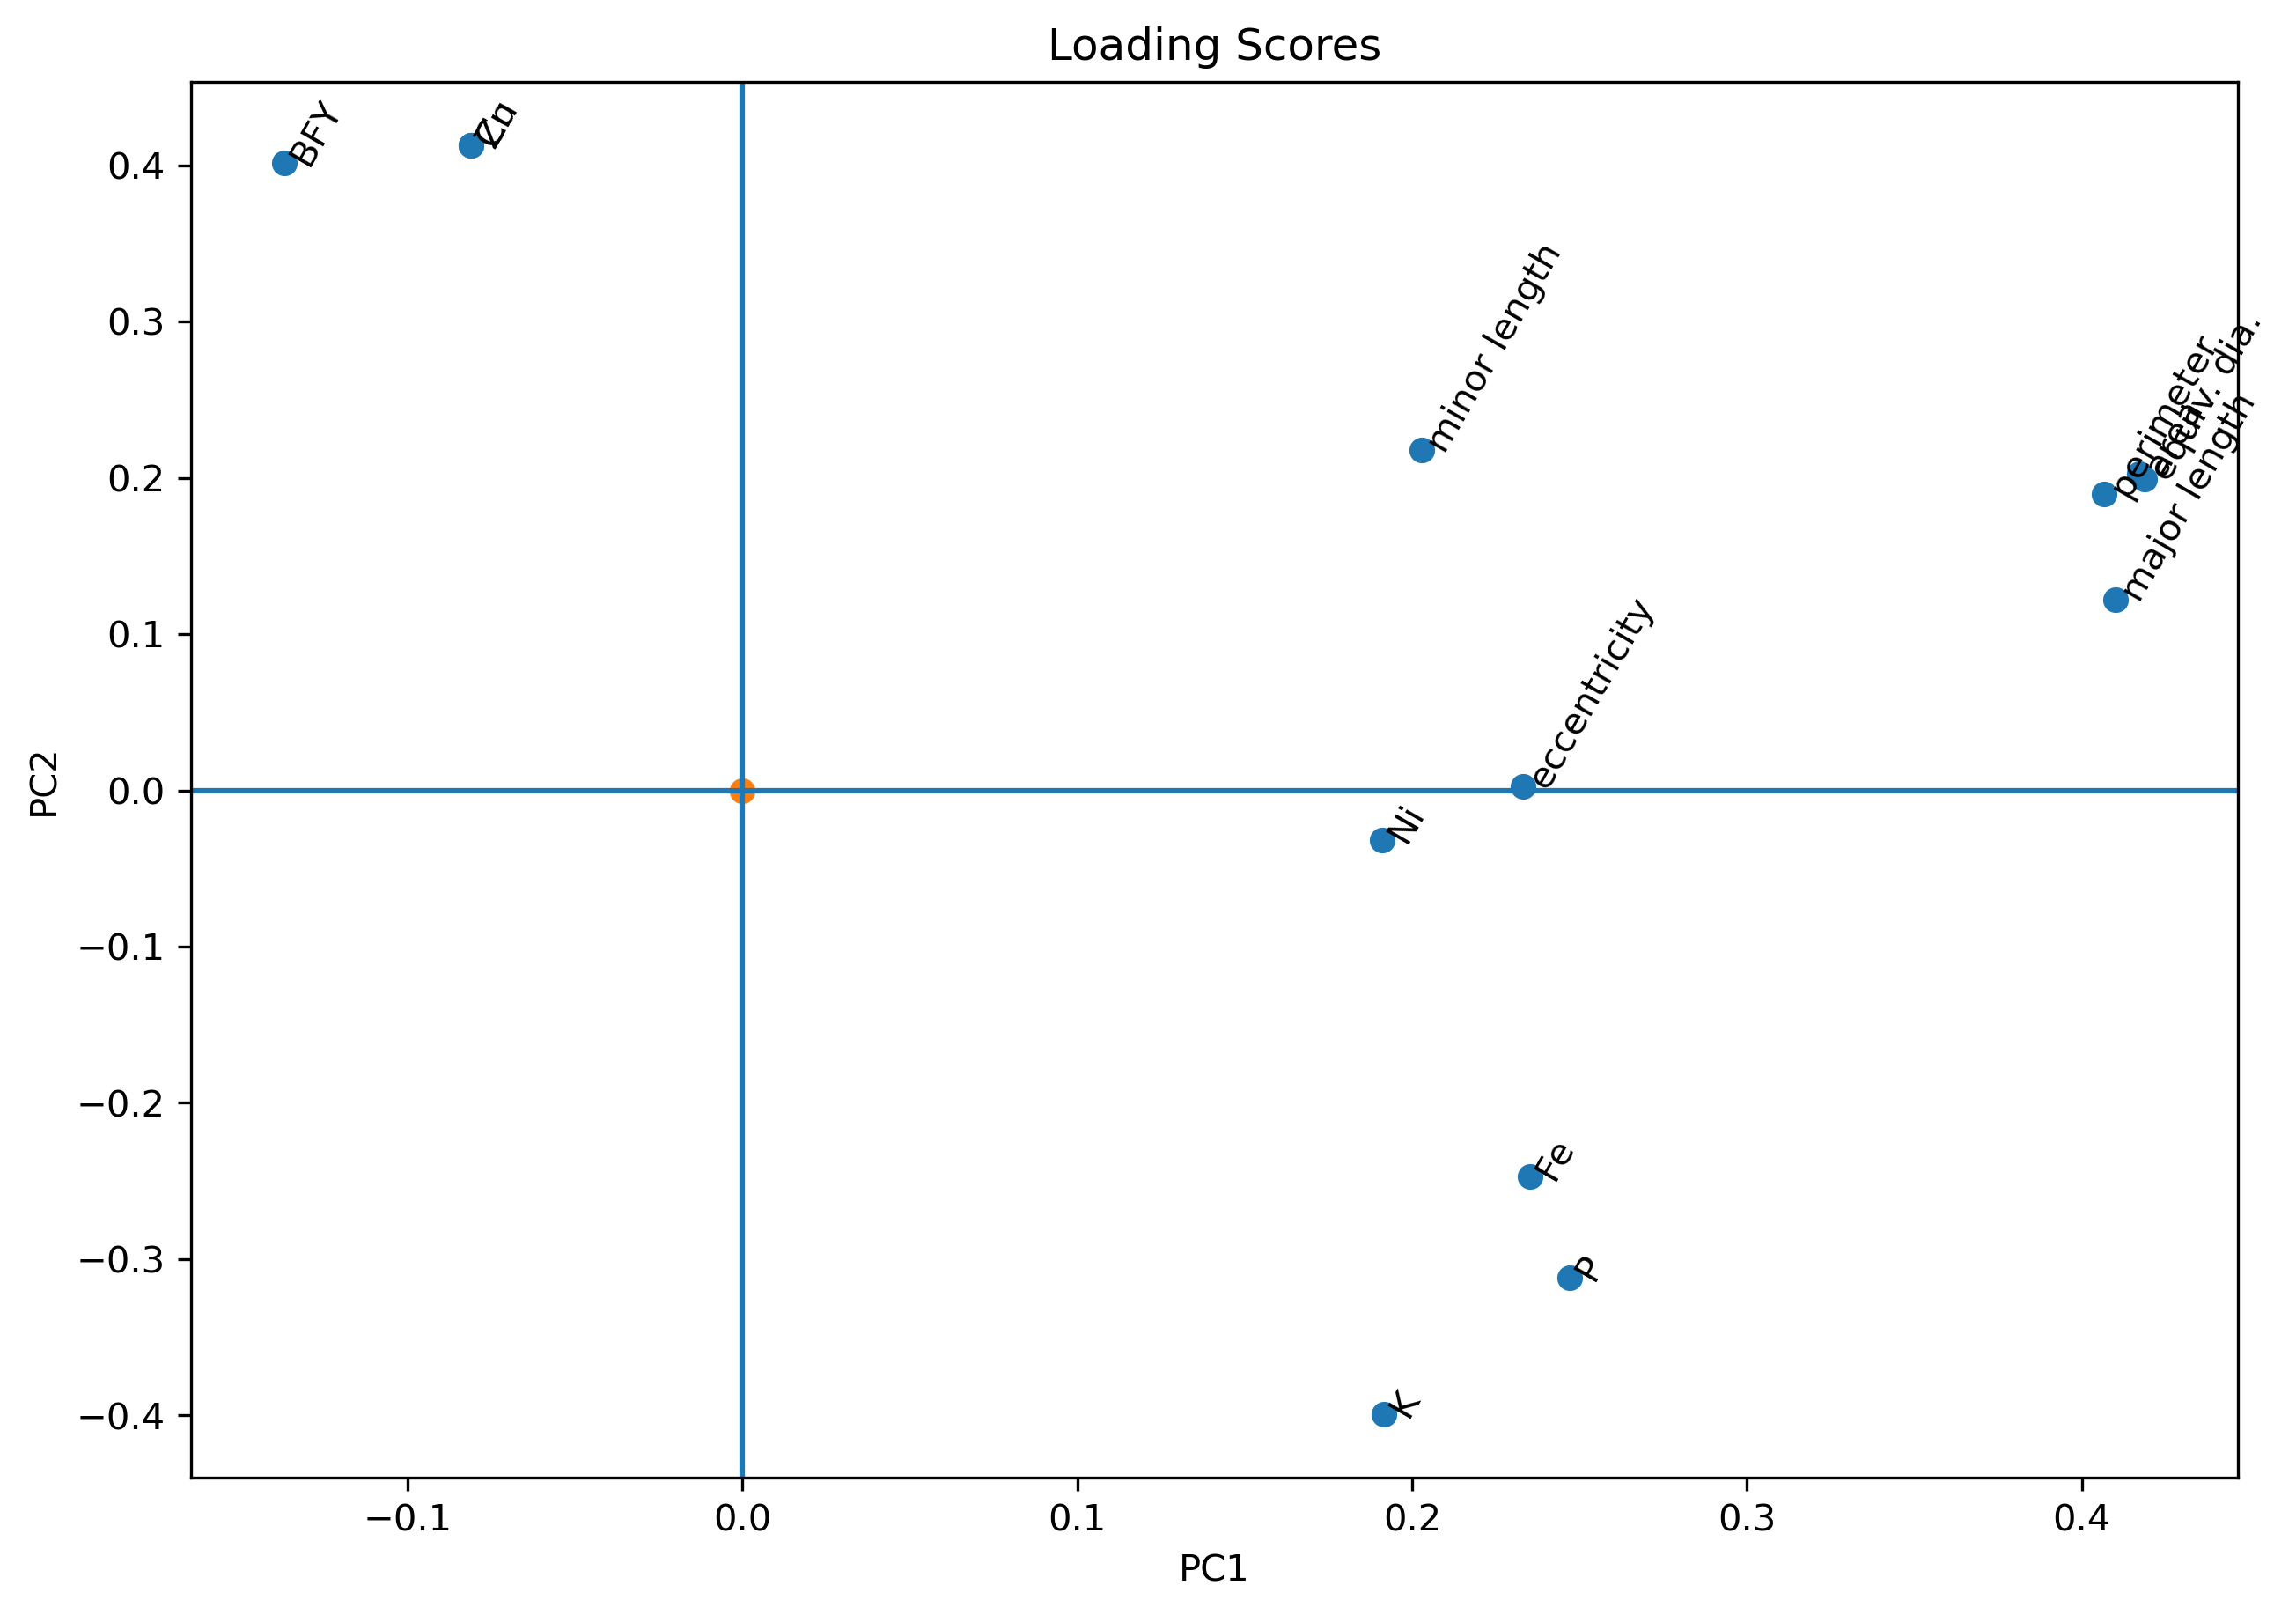

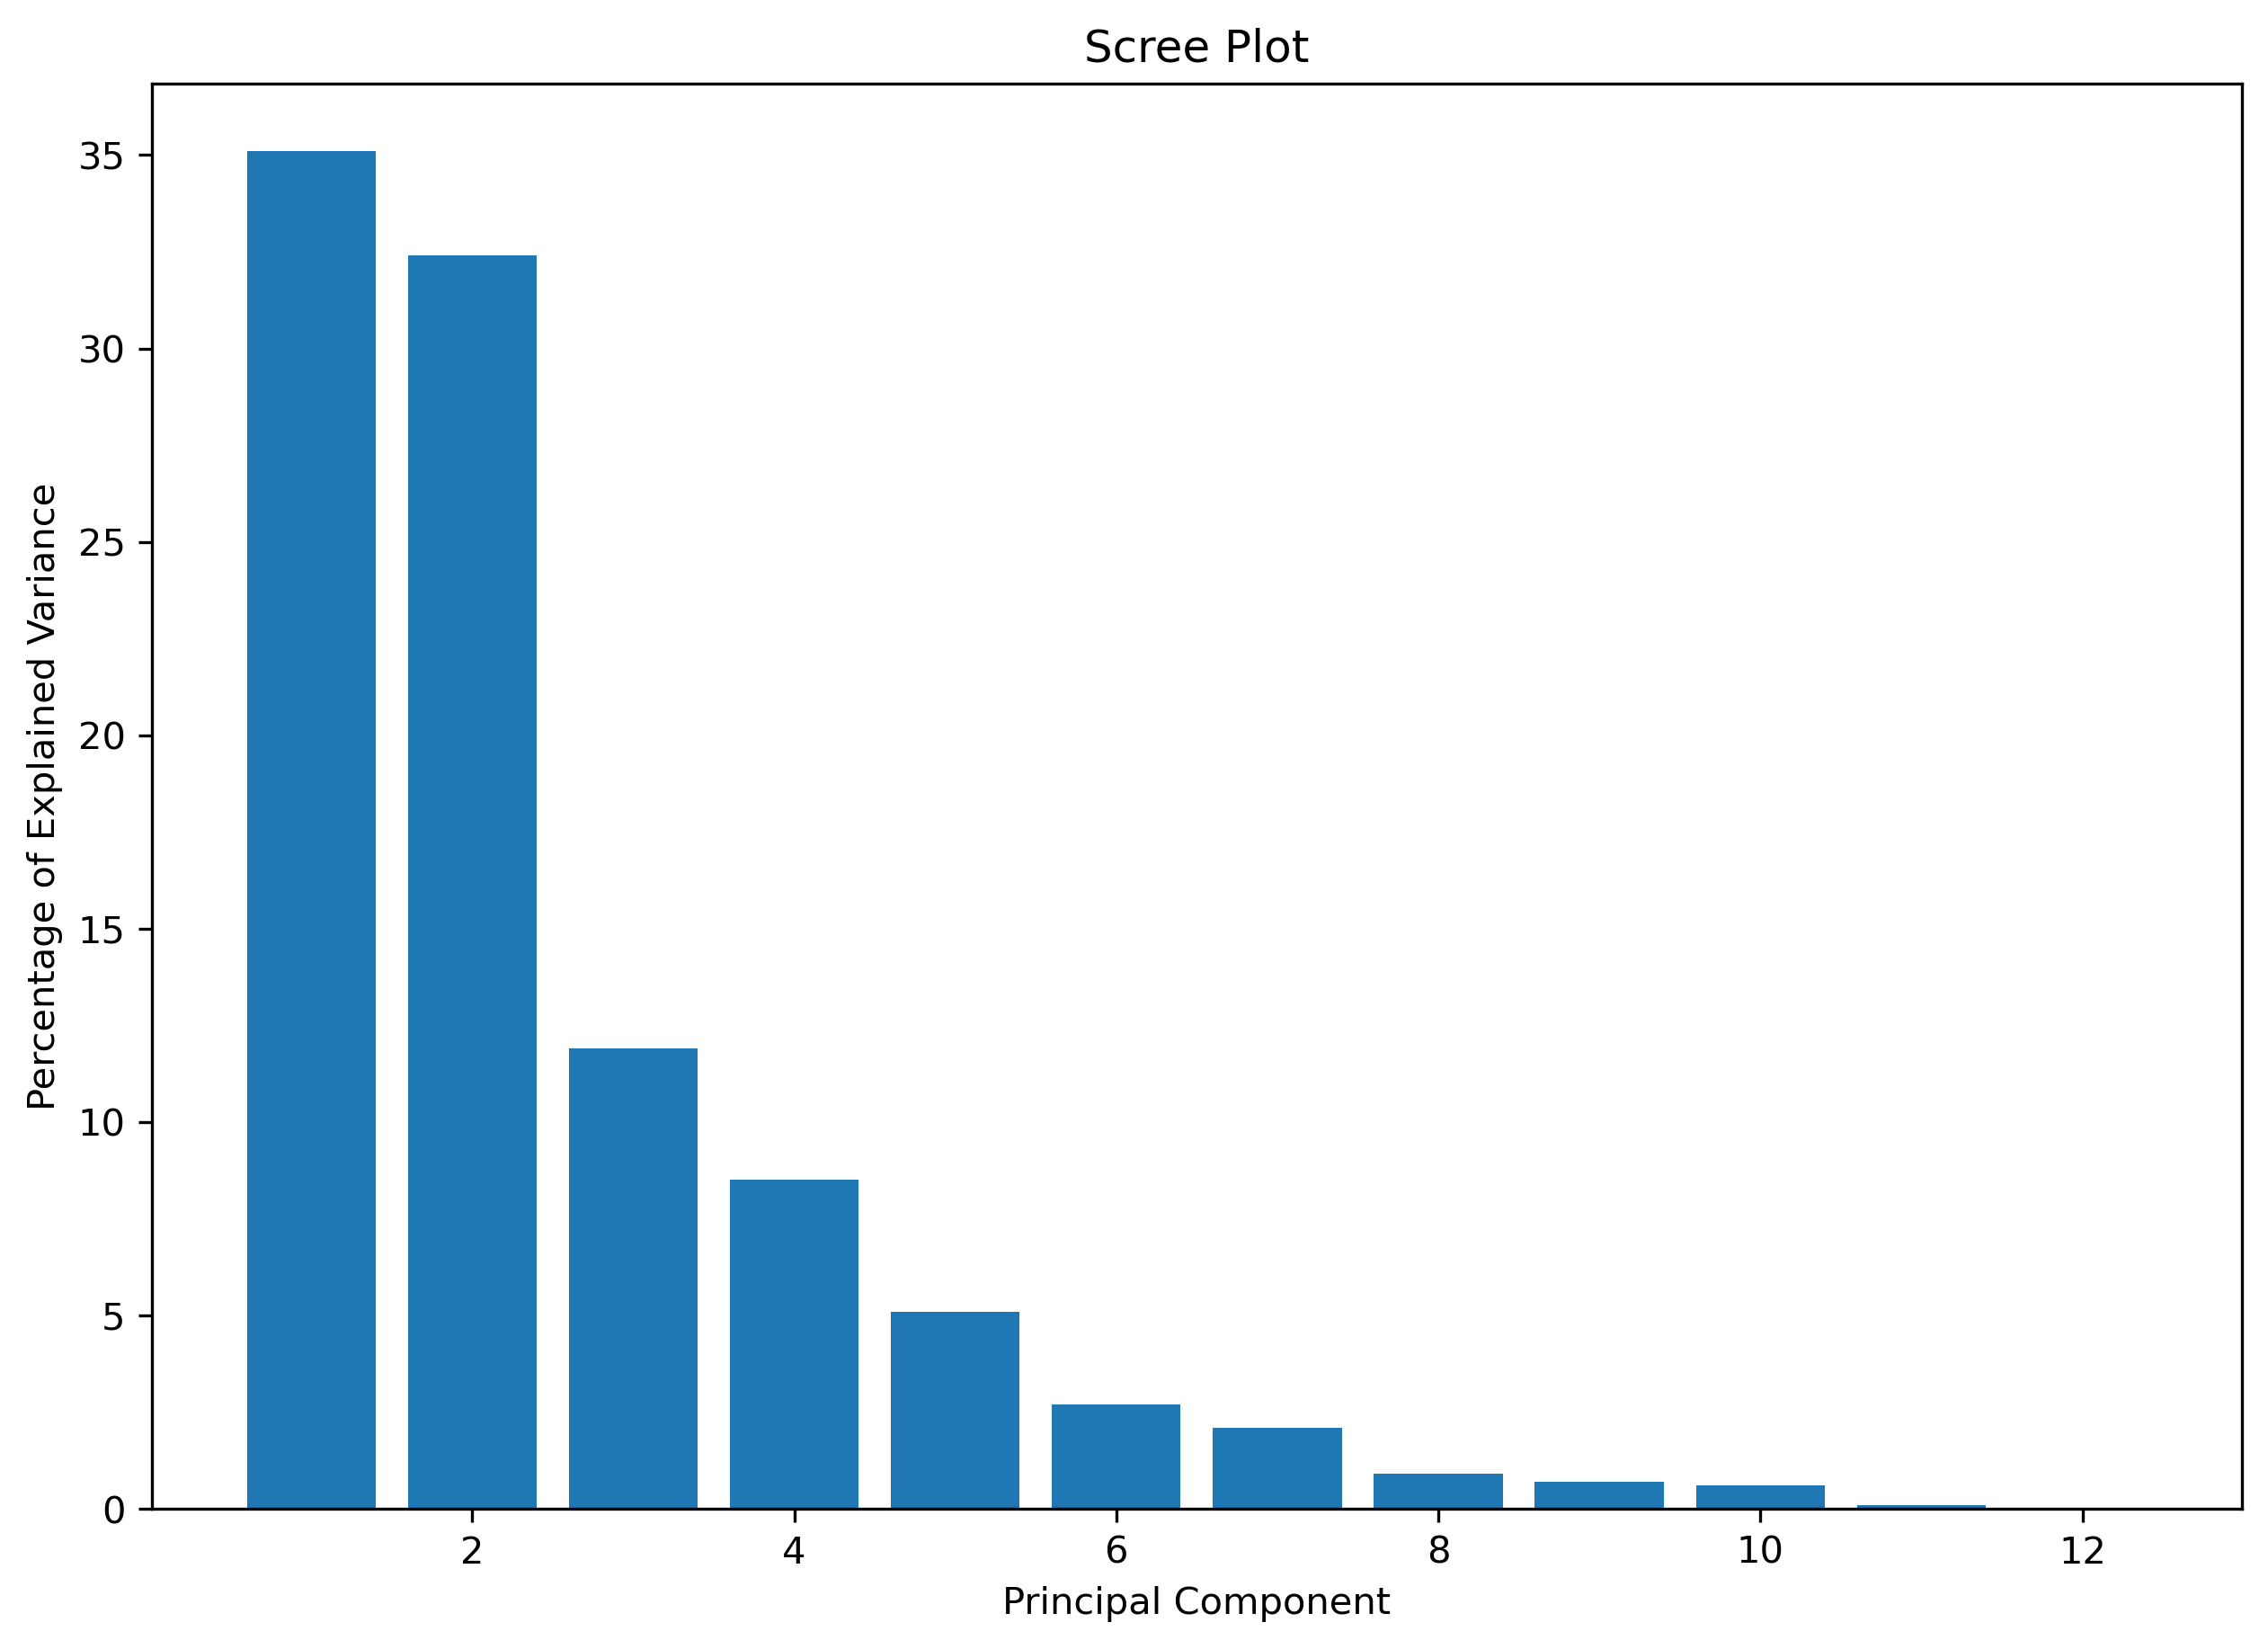

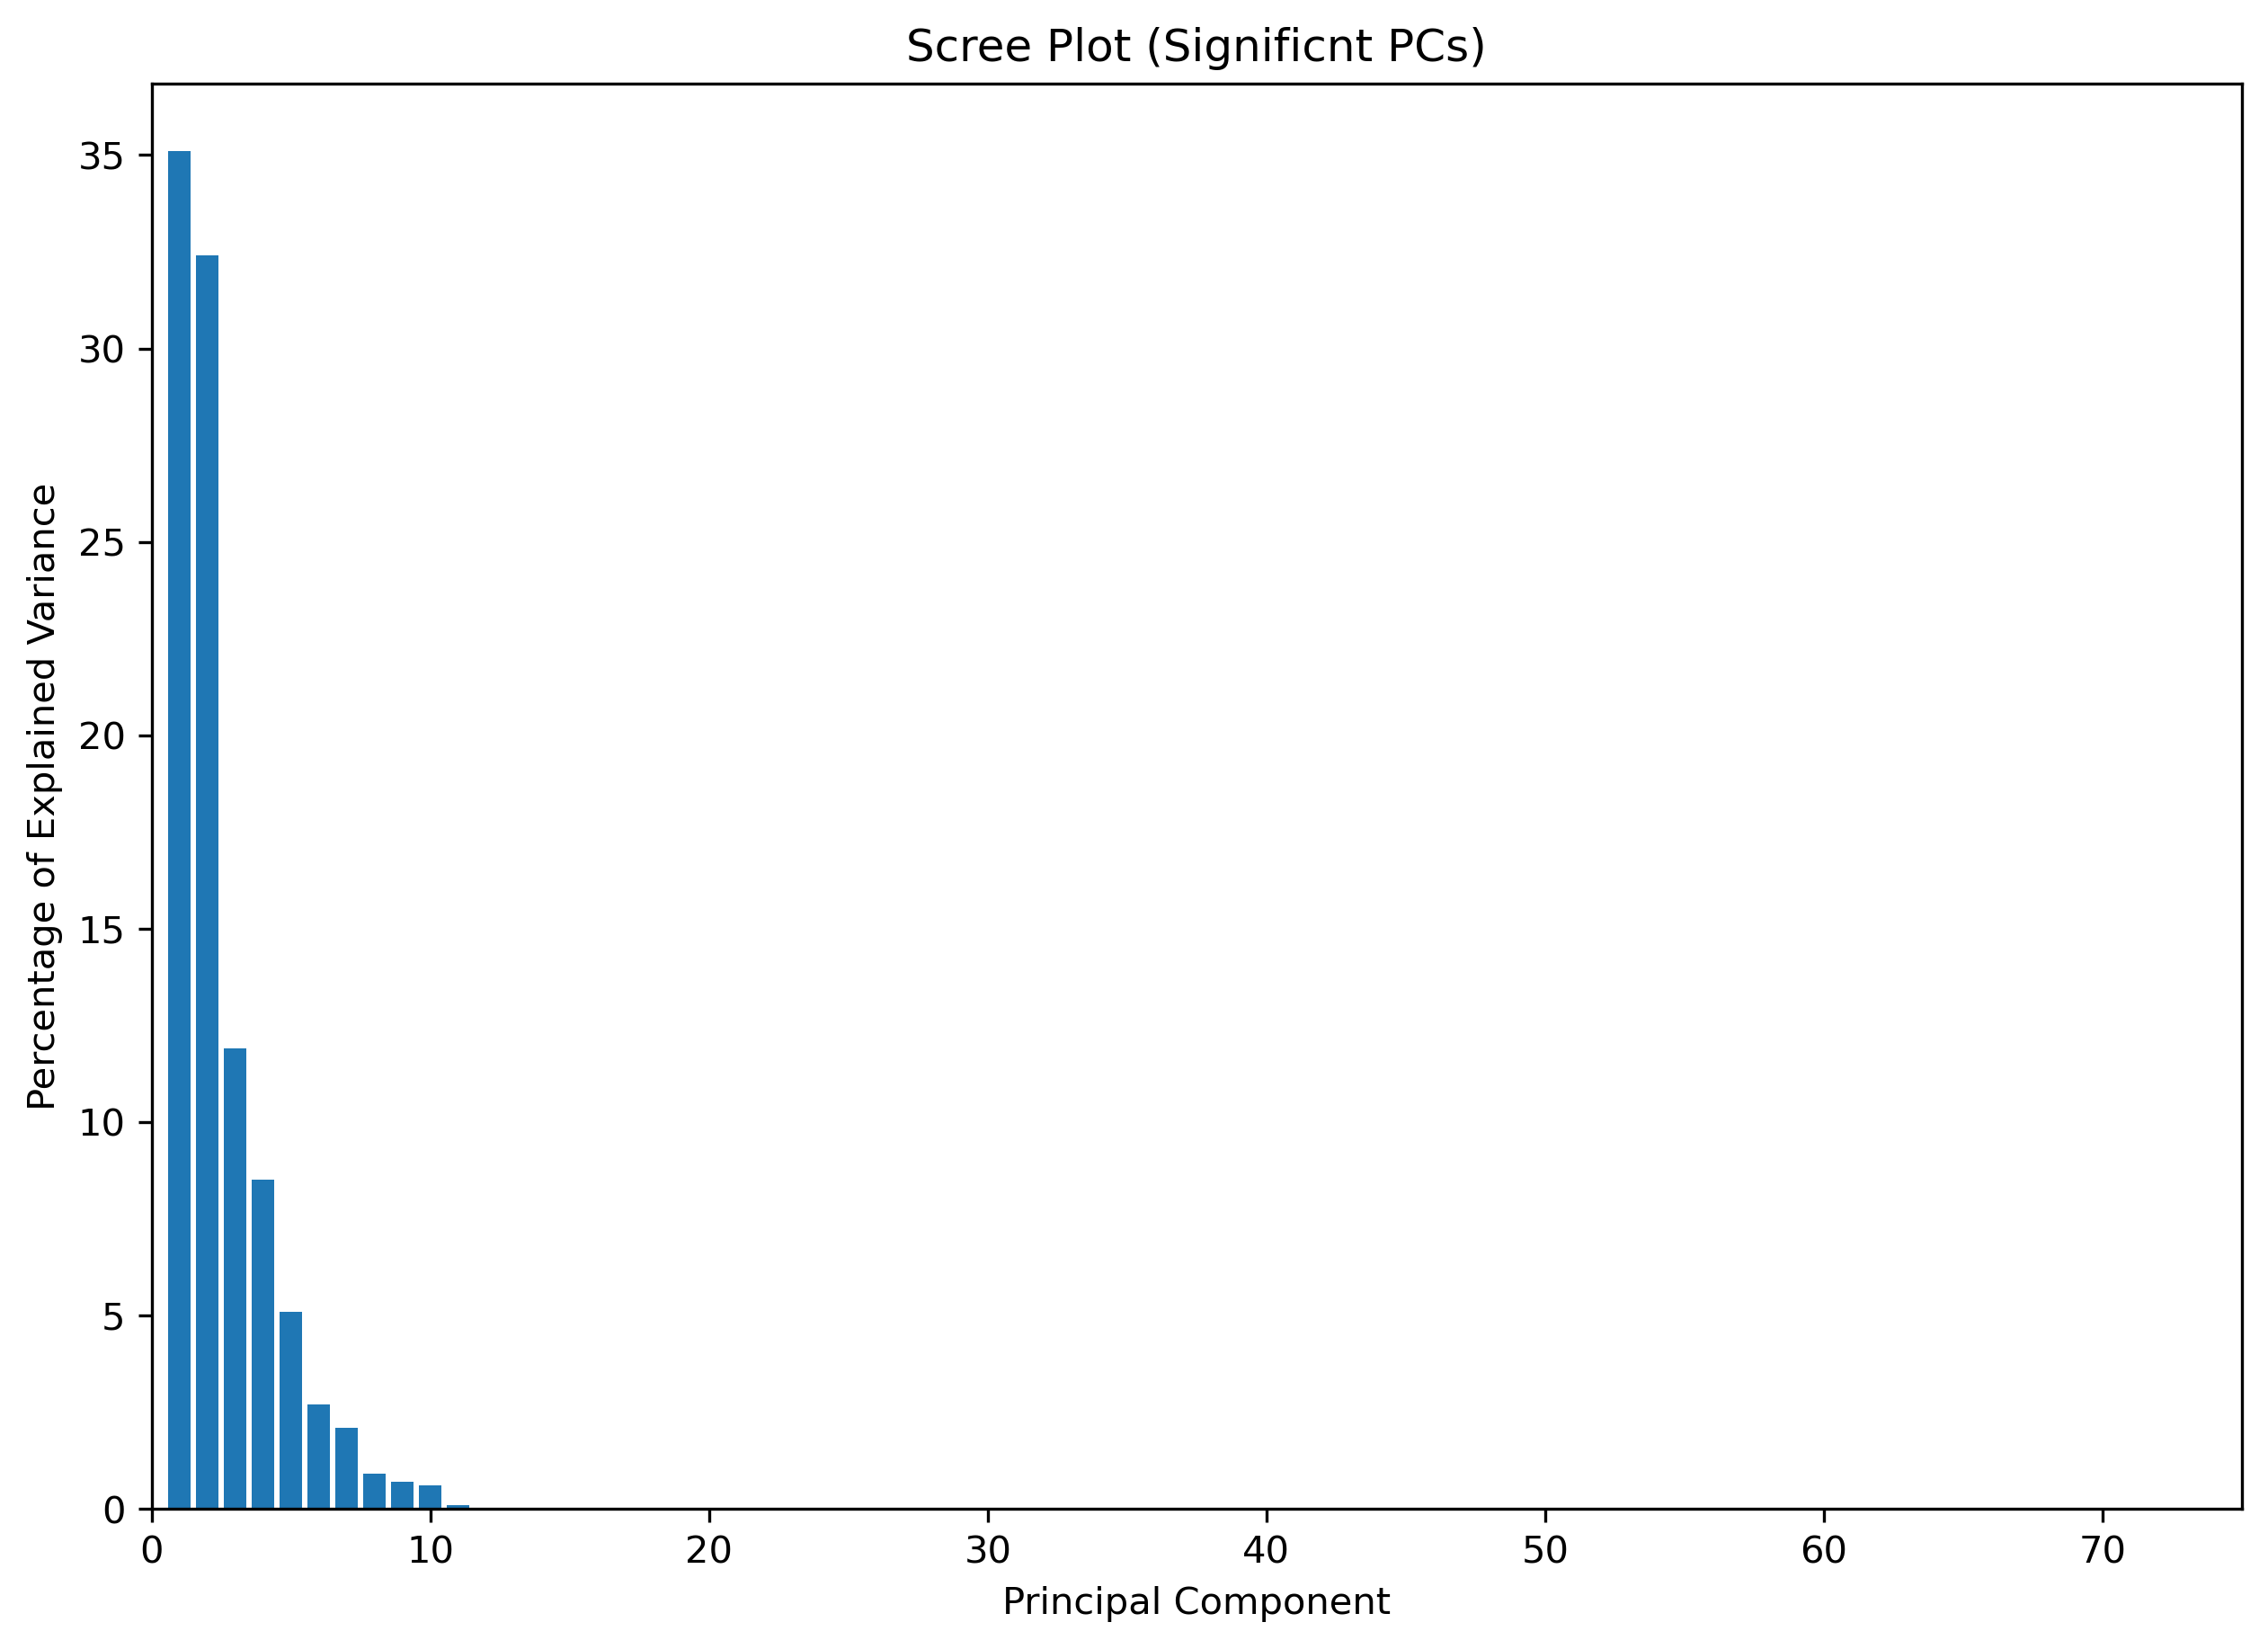

In [8]:
X_standard = StandardScaler().fit_transform(mod_X)
# print(X_standard[0])

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_standard)

secondaryDf['PC1']=principalComponents[:,0]
secondaryDf['PC2']=principalComponents[:,1]

print('Cells, PCs', principalComponents.shape)

print('singular_values_:', pca.singular_values_)
print('explained_variance:', pca.explained_variance_)
print('components:', pca.components_)

fig = plt.figure(figsize=(10,7),dpi=300);

plt.scatter(pca.components_[0],pca.components_[1]) #, tick_label=PClabels
plt.title('Loading Scores')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axhline()
plt.axvline()

names = ['area','eccentricity','equiv. dia.','major length','minor length','perimeter',
        'K','P','Ni','Zn',
         'Fe','Cu', 'BFY']

for i, txt in enumerate(names):
    plt.annotate(txt, (pca.components_[0][i], pca.components_[1][i]), rotation=60, size=10)

plt.scatter(0,0)
plt.show()

#scree plot

high_pca = PCA(n_components=12)
high_pca.fit_transform(X_standard)

#calculate percentage of variation in each principal components
per_var=np.round(high_pca.explained_variance_ratio_*100, decimals=1)
PClabels =['PC' + str(x) for x in range(1,len(per_var)+1)]

fig = plt.figure(figsize=(10,7),dpi=300);
plt.bar(x=range(1, len(per_var)+1),height=per_var) #, tick_label=PClabels
plt.title('Scree Plot')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.show()
#zoom in on the important PCs
fig = plt.figure(figsize=(10,7),dpi=300);
plt.bar(x=range(1, len(per_var)+1),height=per_var) #, tick_label=PClabels
plt.title('Scree Plot (Significnt PCs)')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.xlim(0,75)
plt.show()

Text(0, 0.5, 'PC2')

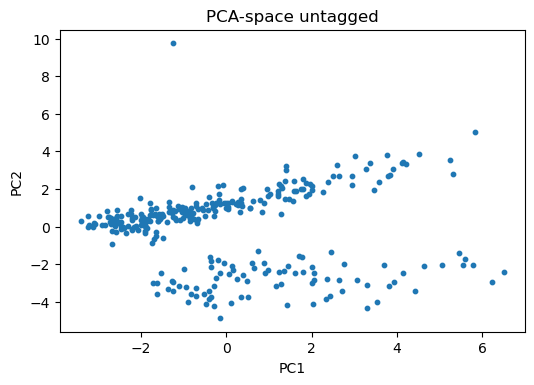

In [9]:
plt.figure(dpi=100)
plt.scatter(secondaryDf['PC1'],secondaryDf['PC2'], s=10)
plt.title('PCA-space untagged')
plt.xlabel('PC1')
plt.ylabel('PC2')

# k-means and the cluster centeres

inertia:  1549.5870078785686


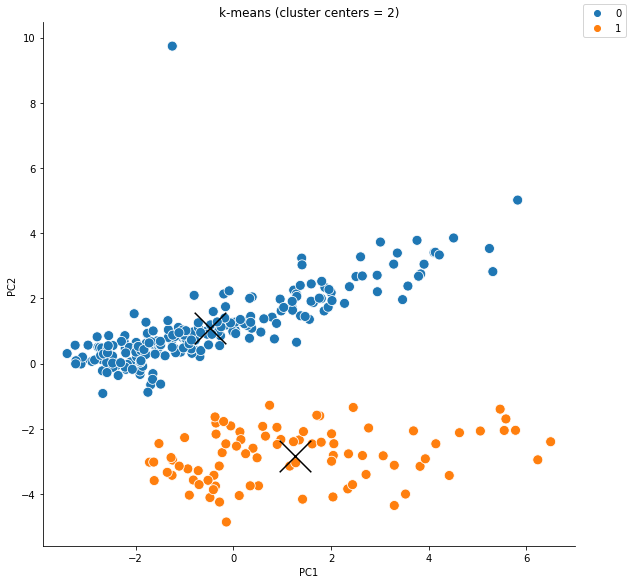

In [10]:


kmeans = KMeans(n_clusters = 2, random_state = 42).fit(secondaryDf[['PC1','PC2']].to_numpy())
inertia=kmeans.inertia_
secondaryDf['Class'] = kmeans.labels_

print('inertia: ', inertia)
pp = sns.pairplot(data=secondaryDf,
                  y_vars=['PC2'],
                  x_vars=['PC1'],
                  kind = 'scatter', 
                 diag_kind='hist', corner = 'True', hue='Class', height=8,plot_kws={"s": 100}
                 )
leg_handles = pp._legend_data.values()
leg_labels = pp._legend_data.keys()
pp.fig.legend(handles=leg_handles, labels=leg_labels, loc='upper right', ncol=1)
pp._legend.remove() # remove existing legend
pp.set(xlabel='PC1',
       ylabel='PC2',
       title='k-means (cluster centers = 2)')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker='x',s=1000, facecolors='black')

## usign heuristics, tag live and dead cells
In 2018 version copper can be used as a feature. For current version copper should go inside BFY

In [11]:

# now create mult label data frame with strict conditions

labels = [0] * mod_X.shape[0]


secondaryDf['text_labels'] = labels


# (live)
K_threshold=secondaryDf['K'].median() #default is median
KbyP_threshold=secondaryDf['K'].median() #default is median

True_list = secondaryDf.loc[
    (secondaryDf['major_axis_length']>=1) & 
    (secondaryDf['major_axis_length']<= 3) &
    (secondaryDf['minor_axis_length']>=0.5) & 
    (secondaryDf['minor_axis_length']<= 1.5) &
    (secondaryDf['K']>=secondaryDf['K'].median()) &
    (secondaryDf['K']/secondaryDf['P']>=(secondaryDf['K']/secondaryDf['P']).median())
   ].index.tolist()

print('From heuristics, live cell count: ', len(True_list) )

for idx in True_list:
    labels[idx]=1
    
# (Dead)
Ni_threshold=2.04e-05 #default is half of median
NibyP_threshold=0.48 #default is half of median

NibyZn_threshold=0.021 #default is half of median
NibyFe_threshold=0.32 #default is half of median
NibyK_threshold=0.485 #default is half of median
CubyK_threshold=13 #default is half of median

True_list = secondaryDf.loc[
    (secondaryDf['major_axis_length']>=1) & 
    (secondaryDf['major_axis_length']<= 3) &
    (secondaryDf['minor_axis_length']>=0.5) & 
    (secondaryDf['minor_axis_length']<= 1.5) &
    (secondaryDf['Ni']>=0.25*secondaryDf['Ni'].median()) &
    (secondaryDf['Ni']/secondaryDf['P']>= 0.25*(secondaryDf['Ni']/secondaryDf['P']).median()) &
    (secondaryDf['Ni']/secondaryDf['Zn']>= 0.25*(secondaryDf['Ni']/secondaryDf['Zn']).median()) &
    (secondaryDf['Ni']/secondaryDf['Fe']>= 0.25*(secondaryDf['Ni']/secondaryDf['Fe']).median()) &
    (secondaryDf['Ni']/secondaryDf['K']>= 0.25*(secondaryDf['Ni']/secondaryDf['K']).median()) &
    (secondaryDf['Cu']/secondaryDf['K']>= 0.25*(secondaryDf['Cu']/secondaryDf['K']).median())
   ].index.tolist()    
    
print('From heuristics, dead cell count: ', len(True_list) )

for idx in True_list:
    labels[idx]=2 
    
y=labels
    
for idx in range(len(labels)):
    if labels[idx] ==0:
        labels[idx] = 'unassigned'
    if labels[idx] ==1:
        labels[idx] = 'live cells'
    if labels[idx] ==2:
        labels[idx] = 'dead cells'


        
        
secondaryDf['text_labels'] = labels


From heuristics, live cell count:  116
From heuristics, dead cell count:  215


dict_keys(['dead cells', 'live cells'])


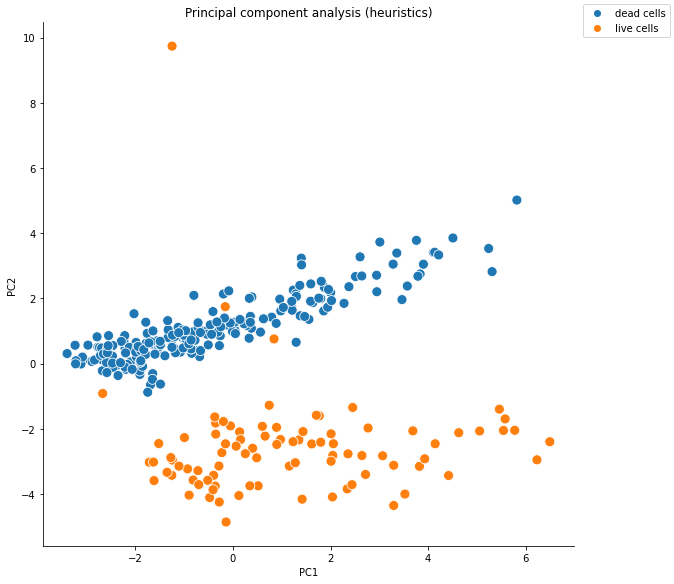

In [12]:
pp = sns.pairplot(data=secondaryDf,
                  y_vars=['PC2'],
                  x_vars=['PC1'],
                  kind = 'scatter', 
                 diag_kind='hist', corner = 'True', hue='text_labels',  height=8,plot_kws={"s": 100}
                 )
leg_handles = pp._legend_data.values()
leg_labels = pp._legend_data.keys()

pp.fig.legend(handles=leg_handles, labels=leg_labels, loc='upper right', ncol=1)
pp._legend.remove() # remove existing legend
print(leg_labels)

pp.set(xlabel='PC1',
       ylabel='PC2',
       title='Principal component analysis (heuristics)')



## use annotations to tag live and dead cells
In 2018 version copper can be used as a feature. For current version copper should go inside BFY

dict_keys(['dead', 'live'])


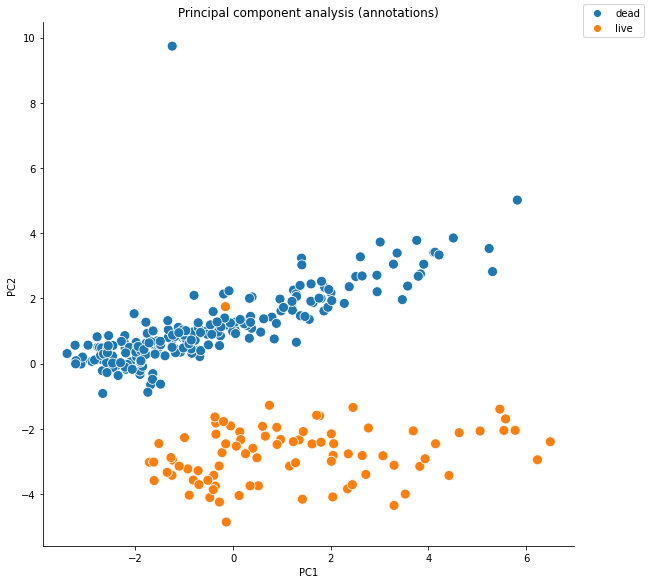

In [13]:
pp = sns.pairplot(data=secondaryDf,
                  y_vars=['PC2'],
                  x_vars=['PC1'],
                  kind = 'scatter', 
                 diag_kind='hist', corner = 'True', hue='KO_label',  height=8,plot_kws={"s": 100}
                 )
leg_handles = pp._legend_data.values()
leg_labels = pp._legend_data.keys()

pp.fig.legend(handles=leg_handles, labels=leg_labels, loc='upper right', ncol=1)
pp._legend.remove() # remove existing legend
print(leg_labels)

pp.set(xlabel='PC1',
       ylabel='PC2',
       title='Principal component analysis (annotations)')



## select datapoints cluster

<IPython.core.display.Javascript object>


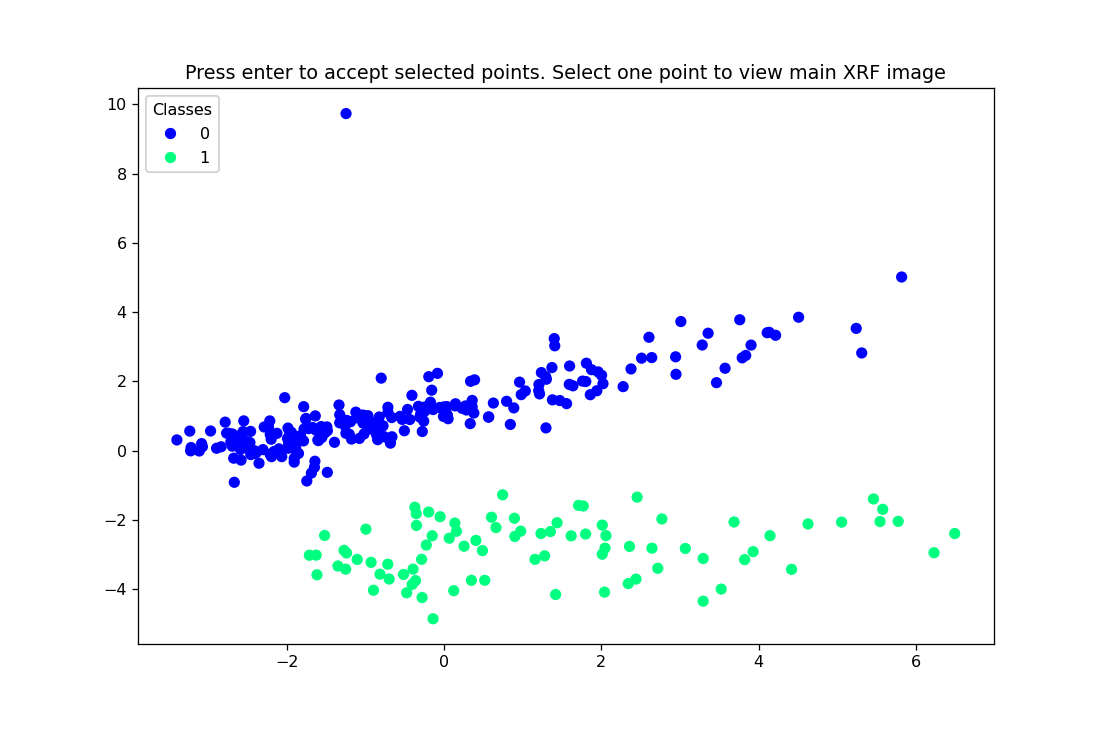

In [14]:


%matplotlib notebook





subplot_kw = dict(autoscale_on=True)
fig, ax = plt.subplots(subplot_kw=subplot_kw)

# pts = ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker='x',s=1000,c=secondaryDf.Class, facecolors='black')

pts = ax.scatter(secondaryDf['PC1'].to_numpy(),secondaryDf['PC2'].to_numpy(), c=secondaryDf.Class,
                 cmap='winter')


# produce a legend with the unique colors from the scatter
legend = ax.legend(*pts.legend_elements(),
                    loc="upper left", title="Classes")
ax.add_artist(legend)


selector = SelectFromCollection(ax, pts)



fig.canvas.mpl_connect("key_press_event", accept)
ax.set_title("Press enter to accept selected points. Select one point to view main XRF image")

plt.show()



In [18]:
#shows selected indices in secondaryDf

print('number of selected cells:', len(selector.ind))

print('modified_indices:', selector.ind)

#conversions to original indices
target_scan_cell_indices = secondaryDf['original index'][selector.ind].to_numpy()
print('original indices:', target_scan_cell_indices)
print('K-means classes \n')
secondaryDf['Class'][selector.ind]

print('cell centers (pixel value in XRF image):' , X_centers[target_scan_cell_indices])
print('\n')
print('cell centers in x (pixel value in XRF image):' , X_centers[target_scan_cell_indices][0])
print('\n')
print('cell x_origins (motor coordinates):' , X_x_origin[target_scan_cell_indices])
print('\n')
print('cell y_origins (motor coordinates):' , X_y_origin[target_scan_cell_indices])

print('\n')
print('send to motor')
print('cell x_center (motor coordinates):' , X_x_motor[target_scan_cell_indices])
print('\n')
print('cell y_center (motor coordinates):' , X_y_motor[target_scan_cell_indices])
print('\n')

print('BBox motor width (x): ', BASE_PATCH_WIDTH*X_x_res[target_scan_cell_indices])
print('BBox motor width (y): ', BASE_PATCH_WIDTH*X_y_res[target_scan_cell_indices])


print('Main XRF image file (selected):' , X_xrf_track_files[target_scan_cell_indices])

motor_coordinates = np.vstack((X_x_motor[target_scan_cell_indices],X_y_motor[target_scan_cell_indices])).T
print(motor_coordinates)


number of selected cells: 18
modified_indices: [ 55  56  58  61  62  63  71  73  74  77  79  80  87  90  91 266 272 302]
original indices: [112 114 119 124 125 126 138 141 142 146 153 155 171 178 179 495 501 553]
K-means classes 

cell centers (pixel value in XRF image): [[ 17.5        211.5       ]
 [ 30.         243.        ]
 [ 48.53846154 200.07692308]
 [ 74.58823529  94.        ]
 [ 95.53333333 145.13333333]
 [111.75        44.8125    ]
 [158.9375     167.3125    ]
 [178.5        154.5       ]
 [180.5         76.5       ]
 [200.         275.        ]
 [ 11.          39.5       ]
 [ 35.76470588  85.        ]
 [112.53333333 134.13333333]
 [149.25        49.25      ]
 [151.66666667 225.94444444]
 [ 12.           9.76470588]
 [ 49.6        190.46666667]
 [308.         116.5       ]]


cell centers in x (pixel value in XRF image): [ 17.5 211.5]


cell x_origins (motor coordinates): [789.712   789.712   789.712   789.712   789.712   789.712   789.712
 789.712   789.712   789.712   869.7

# see cell and bounding box on main XRF image in viewer above using original indices